<a href="https://colab.research.google.com/github/lyubimovao/Logistic-regression/blob/main/Gen_data_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

%matplotlib inline

In [64]:
def sigmoid(Z):

# g - sigmoid function
# g = 1/(1+e**(-z))

  g = np.zeros((np.shape(Z)))
  g = 1./(1. + np.exp(-Z))

  return g

In [65]:
#Cost function for logistic regression (no regularization)
def cost_and_gradient(theta, X, Y, m):
    
    column_ones = np.ones((m, 1))
    X = np.concatenate((column_ones, X), axis=1)

    h_arg = sigmoid(np.dot(X, theta))

    J = (-np.dot(Y,np.log(h_arg)) - 
        np.dot((1. - Y), np.log(1-h_arg)))/m

    gradient = np.dot(X.T, (h_arg -Y.T))/m
    
    return J, gradient


In [66]:
#Cost function for logistic regression ("l2" regularization)
def cost_and_gradient_l2(theta, X, Y, lm, m):
    
    column_ones = np.ones((m, 1))
    X = np.concatenate((column_ones, X), axis=1)
    h_arg = sigmoid(np.dot(X, theta))
    zero_element = np.zeros((1, 1))
    theta_reg = np.concatenate((zero_element, theta[1:,:]), axis=0)

    J = (-np.dot(Y,np.log(h_arg)) - 
        np.dot((1. - Y), np.log(1-h_arg)) + 
        0.5*lm*np.dot(theta_reg.T,theta_reg))/m

    gradient = (np.dot(X.T, (h_arg -Y.T)) + lm * theta_reg)/m
    
    return J, gradient


In [67]:
def gradient_descent(X, Y, alpha, num_iters, penalty, lm):
    m = X.shape[0]
    n = X.shape[1]
    Y = np.reshape(Y, (1, len(Y)))
    theta=np.zeros((n+1,1)) 
    cost_history = []
    J_prev=0.
    if penalty =='l2':
        for iter in range (num_iters):
            J, gradient = cost_and_gradient_l2(theta, X, Y, lm, m)
            theta = theta - alpha*gradient
            conv = np.abs(J - J_prev)
            J_prev =J 
            J = J.item()
            cost_history.append(J)

            if iter % 10 == 0:
                print ('iter: '+str(iter) + 'cost: '+str(J) + '  convergence: '+ str(conv))
                if conv <= 1./(10.**6):
                    print('Convergence criteria reached')     
                    return cost_history, theta
    else:
        for iter in range (num_iters):
            J, gradient = cost_and_gradient(theta, X, Y, m)
            theta = theta - alpha*gradient
            conv = np.abs(J - J_prev)
            J_prev =J 
            J = J.item()
            cost_history.append(J)

            if iter % 10 == 0:
                print ('iter: '+str(iter) + 'cost: '+str(J) + '  convergence: '+ str(conv))
                if conv <= 1./(10.**6):
                    print('Convergence criteria reached')     
                    return cost_history, theta


In [68]:
#Plotting dada
def plot_mydata(X, Y):
  
  Y = np.reshape(Y, (1, len(Y)))
  indices_neg = (Y[0, :] == 0)
  indices_pos = (Y[0, :] == 1)
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(["#FF0000", "#0000FF"])
  p1 = plt.scatter(X[indices_neg,0], X[indices_neg,1], 
                    c= None, cmap=cm_bright, edgecolors="k",
                    label='Class 1 (Ylabel=0)')
  p2 = plt.scatter(X[indices_pos,0], X[indices_pos,1], 
                    c= None, cmap=cm_bright, edgecolors="k",
                    label = 'Class 2 (Ylabel=1)')
  
  plt.xlim((np.amin(X[:, 0]), np.amax(X[:, 0])))
  plt.ylim((np.amin(X[:, 1]), np.amax(X[:, 1])))
  plt.ylabel('Feature 2')
  plt.xlabel('Feature 1')
  plt.title("Data to classify")
  plt.legend(loc='upper right', fontsize=10)
  plt.show()
  return

In [69]:
#Plotting data with desicion boundary (2 features case)
def plot_mydata_decision(X, Y, theta):
  
  Y = np.reshape(Y, (1, len(Y)))
  indices_neg = (Y[0, :] == 0)
  indices_pos = (Y[0, :] == 1)
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(["#FF0000", "#0000FF"])
  p1 = plt.scatter(X[indices_neg,0], X[indices_neg,1], 
                    c= None, cmap=cm_bright, edgecolors="k",
                    label='Class 1 (Ylabel=0)')
  p2 = plt.scatter(X[indices_pos,0], X[indices_pos,1], 
                    c= None, cmap=cm_bright, edgecolors="k",
                    label = 'Class 2 (Ylabel=1)')
  decision_x = np.array([np.amax(X[:,0]), np.amin(X[:,0])])
  decision_y = -1.*(theta[1]*decision_x + theta[0])/theta[2]  
  p3 = plt.plot(decision_x, decision_y, '-r', marker = "+", label = 'Decision boundary')
  plt.xlim((np.amin(X[:, 0]), np.amax(X[:, 0])))
  plt.ylim((np.amin(X[:, 1]), np.amax(X[:, 1])))
  plt.ylabel('Feature 2')
  plt.xlabel('Feature 1')
  plt.title("Data to classify")
  plt.legend(loc='upper right', fontsize=10)
  plt.show()
  return

In [70]:
#Creating data for binary classification
X_original, Y_original = make_classification(n_samples=600,
    n_features=2, n_redundant=0, n_informative=2, random_state=55, n_clusters_per_class=2
)
X_train, X_test, Y_train, Y_test = train_test_split(X_original, Y_original, test_size=0.4, random_state=55)
#rng = np.random.RandomState(2)
#X += 2 * rng.uniform(size=X.shape)


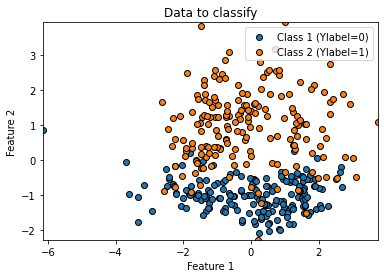

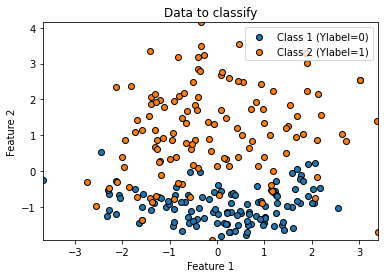

In [71]:
#Visualizing my data

plot_mydata(X_train, Y_train)

plot_mydata(X_test, Y_test)



iter: 0cost: 0.6931471805599453  convergence: [[0.69314718]]
iter: 10cost: 0.27686261631419967  convergence: [[0.00119445]]
iter: 20cost: 0.2727203630719677  convergence: [[0.00013814]]
iter: 30cost: 0.2721433795684433  convergence: [[2.29907384e-05]]
iter: 40cost: 0.27204157431690823  convergence: [[4.3018436e-06]]
iter: 50cost: 0.2720220820879461  convergence: [[8.43197804e-07]]
Convergence criteria reached
[0.59171388 0.08586104 3.6074796 ]
4.0


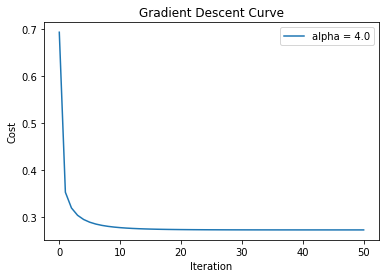

In [104]:
#Learning parameters using Gradient Decsent
SC = StandardScaler() 
X = SC.fit_transform(X_train)
Y = Y_train

num_iters = 1300
alpha = 4.0
penalty='l2'
lm=1.0

cost_history =[]
cost_history, theta_grad_desc = gradient_descent(X, Y, alpha, num_iters, penalty, lm)

print(theta_grad_desc.flatten())
print(alpha) 
plt.plot(cost_history, label = ("alpha = " + str(alpha)))
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.title("Gradient Descent Curve")
plt.legend()
#print(cost_history)

[[0.78374457]
 [0.12393801]
 [4.27046705]]


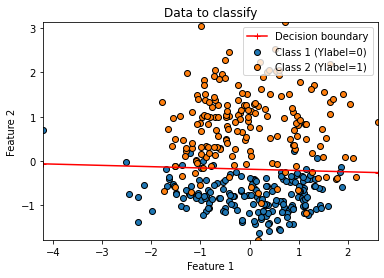

In [73]:
#plotting decision boundary
print(theta_grad_desc)
plot_mydata_decision(X = X, Y = Y, theta = theta_grad_desc)


Here I will try scipy.optimize.minimize to minimize my J function

In [74]:
# defining functions for further use in scipy.optimize.minimize
def eqn(theta):

    SC = StandardScaler() 
    X = SC.fit_transform(X_train)
    Y = Y_train
    m = X.shape[0]

    column_ones = np.ones((X.shape[0], 1))
    X = np.concatenate((column_ones, X), axis=1)
     
    theta = theta.reshape((3,1))
    h_arg = np.dot(X, theta)
    J = (-np.dot(Y,np.log(sigmoid(h_arg))) - 
         np.dot((1. - Y), np.log(1-sigmoid(h_arg))))/m
    
    return J

In [75]:
#Learning parameters using scipy.optimize.minimize instead of Gradient Descent 
theta = np.zeros((3,))

mymin = minimize(eqn, x0 = theta, options={'disp': True})
theta_1 = mymin.x
print(mymin)

Optimization terminated successfully.
         Current function value: 0.250560
         Iterations: 19
         Function evaluations: 80
         Gradient evaluations: 20
      fun: 0.25056011239283627
 hess_inv: array([[20.09718341,  1.55804769, 24.15853548],
       [ 1.55804769,  9.94689857,  5.07980354],
       [24.15853548,  5.07980354, 81.55788054]])
      jac: array([ 3.12924385e-07, -1.55717134e-06,  1.04308128e-07])
  message: 'Optimization terminated successfully.'
     nfev: 80
      nit: 19
     njev: 20
   status: 0
  success: True
        x: array([0.79594092, 0.12606783, 4.30609805])


[0.79594092 0.12606783 4.30609805]


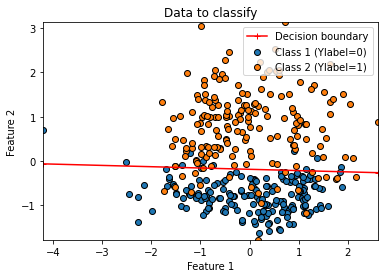

In [76]:
#plotting decision boundary (theta_1 is taken from scipy minimization)
print(theta_1)
plot_mydata_decision(X = X, Y = Y, theta = theta_1)


Here I will try scikit-learn LogisticRegression classifier 

In [108]:
SC = StandardScaler() 
X = SC.fit_transform(X_train)

Y = Y_train

clf = LogisticRegression(penalty = 'l2', random_state=0).fit(X,Y)
theta_skl_12 = clf.coef_
theta_skl_0 = np.zeros((1, 1)) + clf.intercept_

print(theta_skl_12)
print(theta_skl_0)
theta_skl = (np.concatenate((theta_skl_0, theta_skl_12), axis = 1)).T
print(theta_skl)

[[0.0870825  3.62688404]]
[[0.59876298]]
[[0.59876298]
 [0.0870825 ]
 [3.62688404]]


[[0.79593397]
 [0.12608711]
 [4.30609471]]


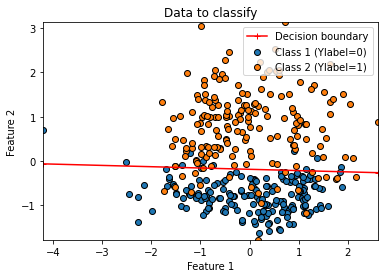

In [84]:
#plotting decision boundary using theta calculated with scikit-learn LogisticRegression classifier 
print(theta_skl)
plot_mydata_decision(X = X, Y = Y, theta = theta_skl)


In [93]:
def predict(theta, X, Y):
    
    m = X.shape[0]

    Y = np.reshape(Y, (1, len(Y)))


    column_ones = np.ones((m, 1))
    X = np.concatenate((column_ones, X), axis=1)


    Y_predicted = np.around(sigmoid(np.dot(X, theta)))


   
    diff = Y - Y_predicted.T
    
    acc =round((100*(1. - float(np.count_nonzero(diff))/m)),2)
 
    return acc, Y_predicted, diff

In [103]:
#Calculating accuracy using theta_grad_desc
# no regularization (penalty = 'none')
Y = Y_train
X = SC.transform(X_train)

acc, Y_predicted, diff = predict(theta_grad_desc, X, Y)

Y = Y_test
X = SC.transform(X_test)

acc_test, Y_predicted_test, diff_test = predict(theta_grad_desc, X, Y)


print('Theta: ', theta_grad_desc)
print('Accuracy= ' + str(acc) + "% on training set vs "  + str(acc_test) + "% on test set")


Theta:  [[0.78374457]
 [0.12393801]
 [4.27046705]]
Accuracy= 91.11% on training set vs 86.67% on test set


In [105]:
#Calculating accuracy using theta_grad_desc
# with l2 regularization (penalty = 'l2'), lm = 1.0
Y = Y_train
X = SC.transform(X_train)

acc, Y_predicted, diff = predict(theta_grad_desc, X, Y)

Y = Y_test
X = SC.transform(X_test)

acc_test, Y_predicted_test, diff_test = predict(theta_grad_desc, X, Y)

print('l2 regularization gives Theta: ', theta_grad_desc)
print('Accuracy= ' + str(acc) + "% on training set vs "  + str(acc_test) + "% on test set")

l2 regularization gives Theta:  [[0.59171388]
 [0.08586104]
 [3.6074796 ]]
Accuracy= 91.11% on training set vs 87.08% on test set


In [107]:
#Calculating accuracy using theta_skl calculated with 
#scikit-learn LogisticRegression classifier
# no regularization (penalty = 'none')

Y = Y_train
X = SC.transform(X_train)

acc, Y_predicted, diff = predict(theta_skl, X, Y)

Y = Y_test
X = SC.transform(X_test)

acc_test, Y_predicted_test, diff_test = predict(theta_skl, X, Y)


print('Theta: ', theta_skl)
print('Accuracy= ' + str(acc) + "% on training set vs "  + str(acc_test) + "% on test set")


Theta:  [[0.79593397]
 [0.12608711]
 [4.30609471]]
Accuracy= 91.11% on training set vs 86.67% on test set


In [109]:
#Calculating accuracy using theta_skl calculated with 
#scikit-learn LogisticRegression classifier
# with l2 regularization (penalty = 'l2'), C=1.0

Y = Y_train
X = SC.transform(X_train)

acc, Y_predicted, diff = predict(theta_skl, X, Y)

Y = Y_test
X = SC.transform(X_test)

acc_test, Y_predicted_test, diff_test = predict(theta_skl, X, Y)


print('l2 regularization gives Theta: ', theta_skl)
print('Accuracy= ' + str(acc) + "% on training set vs "  + str(acc_test) + "% on test set")


l2 regularization gives Theta:  [[0.59876298]
 [0.0870825 ]
 [3.62688404]]
Accuracy= 91.11% on training set vs 87.08% on test set
